In [ ]:
  import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from wordcloud import WordCloud
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Your code here # read data
trump_tweets=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/realdonaldtrump.csv")
trump_tweets.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [ ]:
import re
def rm_link(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def rm_punct2(text):
    return re.sub(r'["\-]', ' ', text)
    

def clean_pipeline(text):    
    no_link = rm_link(text)
    no_punct = rm_punct2(no_link)
    """
    no_html = rm_html(no_link)
    no_extra= preprocess_tweet_text(no_html)
    #space_punct = space_bt_punct(no_html)
    no_punct = rm_punct2(no_extra)
    no_number = rm_number(no_punct)
    no_whitespaces = rm_whitespaces(no_number)
    no_nonasci = rm_nonascii(no_whitespaces)
    no_emoji = rm_emoji(no_nonasci)
    lower = make_lower(no_emoji)
    spell_corrected = spell_correction(lower)
    """
    return no_punct

  
trump_tweets['content'] = trump_tweets['content'].apply(clean_pipeline)

trump_tweets.head()


,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,My persona will never be that of a wallflower...,2009-05-12 09:07:28,1375,1945,NaN,NaN


In [ ]:
# Select only the columns, which will be used
trump_tweets = trump_tweets.drop(["id","link"], axis = 1)

trump_tweets.describe()
trump_tweets.head()

,content,date,retweets,favorites,mentions,hashtags
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,My persona will never be that of a wallflower...,2009-05-12 09:07:28,1375,1945,NaN,NaN


lets run some basic analysis on the Data


Number of tweet per year 


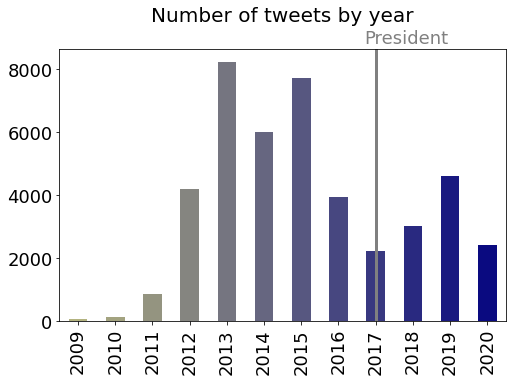

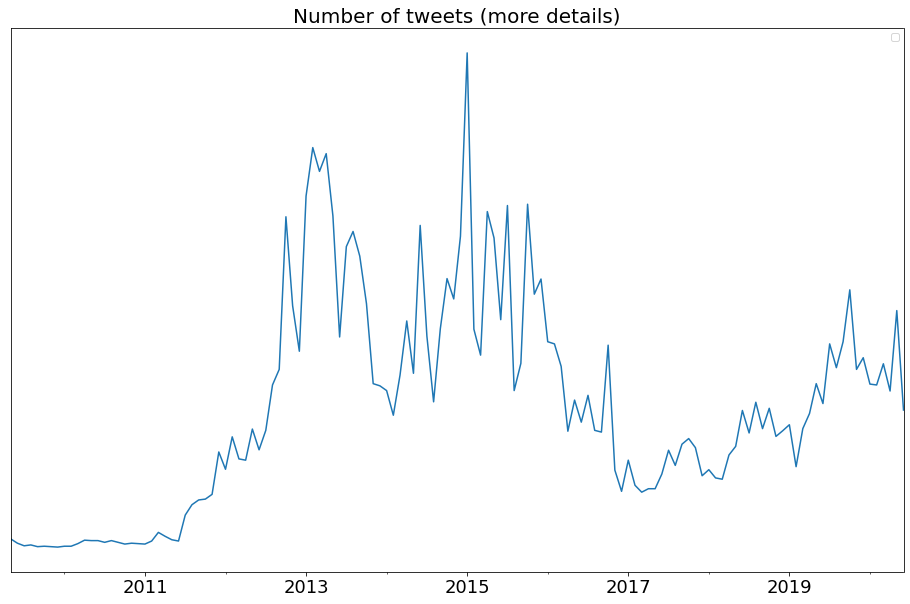

In [ ]:
trump_tweets["date"] = pd.to_datetime(trump_tweets["date"])
trump_tweets["date"].apply(lambda x: x.year)

# Number of tweets by year
colors = []
for i in range(2020-2009+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)

bar = trump_tweets["date"].apply(lambda x: x.year).value_counts().sort_index().plot.bar(figsize = (8,5), color = colors)
plt.title("Number of tweets by year\n", fontsize=20)
bar.tick_params(labelsize=14)
plt.axvline(8, 0 ,1, color = "grey", lw = 3)
plt.text(7.7, 8800, "President", fontsize = 18, color = "grey")
bar.tick_params(labelsize=18)
plt.show()

# Number of tweets (more details)
trump_tweets["year_month"] = trump_tweets["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
trump_tweets["year_month"] = pd.to_datetime(trump_tweets["year_month"])
year_month = pd.pivot_table(trump_tweets, values = "content", index = "year_month", aggfunc = "count")

bar = year_month.plot(figsize = (16,10))
plt.title("Number of tweets (more details)", fontsize=20)
plt.axvline(8, 0 ,1, color = "grey", lw = 3)
bar.tick_params(labelsize=18)
plt.legend("")
plt.xlabel("")
bar.get_yaxis().set_visible(False)
plt.show()



number of retweets/ favorites

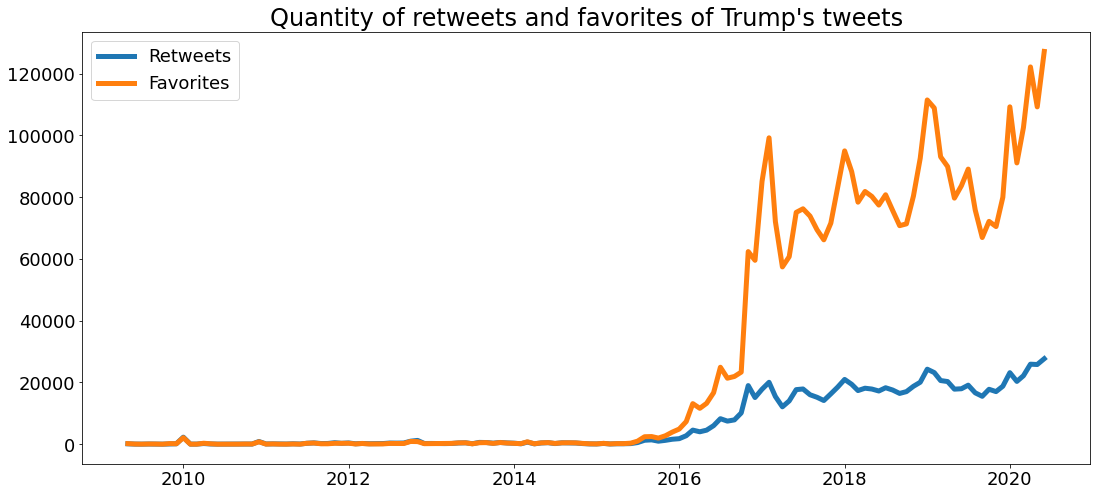

In [ ]:
# Create the visualization
fig = plt.figure(figsize = (14,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Quantity of retweets and favorites of Trump's tweets", fontsize=24)
ax.tick_params(labelsize=14)

# Monthly Average number of "retweets"
year_month = pd.pivot_table(trump_tweets, values = "retweets", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5)

# Monthly Average number of "favorites"
year_month = pd.pivot_table(trump_tweets, values = "favorites", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5)

# Add the "president" and "corona" lines
ax.legend(["Retweets","Favorites"], fontsize=18)
ax.tick_params(labelsize=18)
plt.show()

In [ ]:
!pip install squarify
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# loading stop words from nltk library
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        #Removing link
        url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
        total_text = re.sub(url_pattern, ' ', total_text)
        # replace every special char with space
        #total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        #total_text=total_text.replace('realdonaldtrump','').replace('donald','').replace('trump','')
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                word=(word)
                string += word + " "
        
        trump_tweets[column][index] = string

for index, row in trump_tweets.iterrows():
    if type(row['content']) is str:
        preprocessing(row['content'], index, 'content')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

import squarify
from sklearn.feature_extraction.text import CountVectorizer
def top50Words(business_year):
  vec = CountVectorizer().fit(business_year['content'])
  bag_of_words = vec.transform(business_year['content'])
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)


  y =dict(words_freq[:30])

  fig = plt.figure(figsize=(15, 15))
  squarify.plot(sizes = y.values(), label = y.keys(), color=sns.color_palette("RdGy", n_colors=20),
              linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
  plt.title('Top 30 words', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
  plt.axis('off')
  plt.show()

Top 50 words

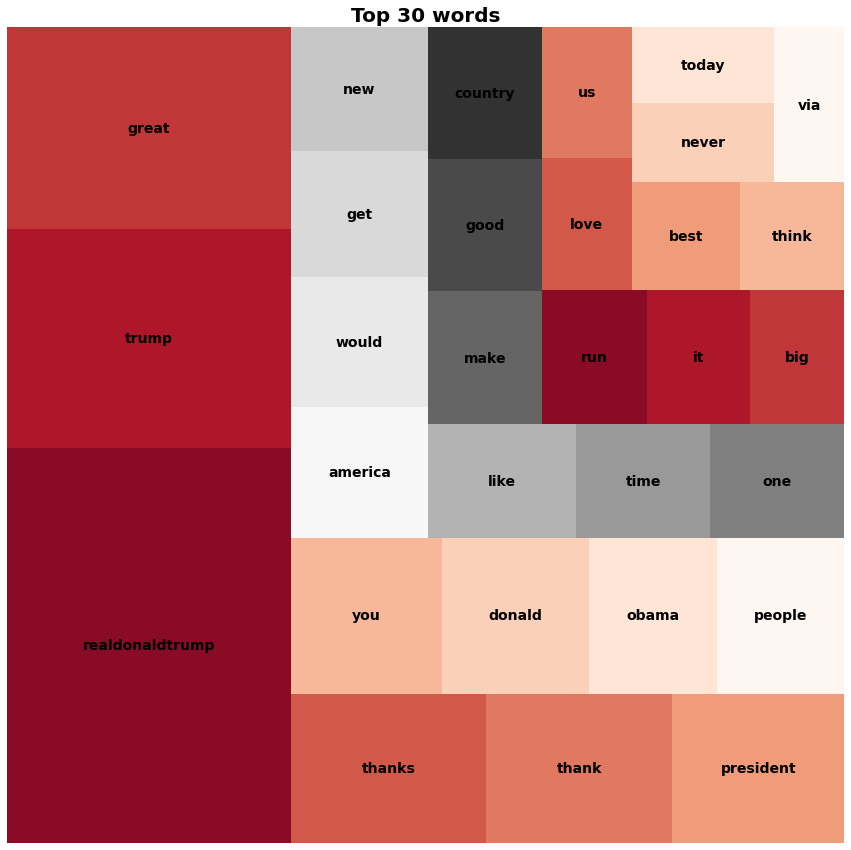

In [ ]:
#during business year
business_year=trump_tweets[((trump_tweets["date"].apply(lambda x: x.year)<=2017))]
top50Words(business_year)


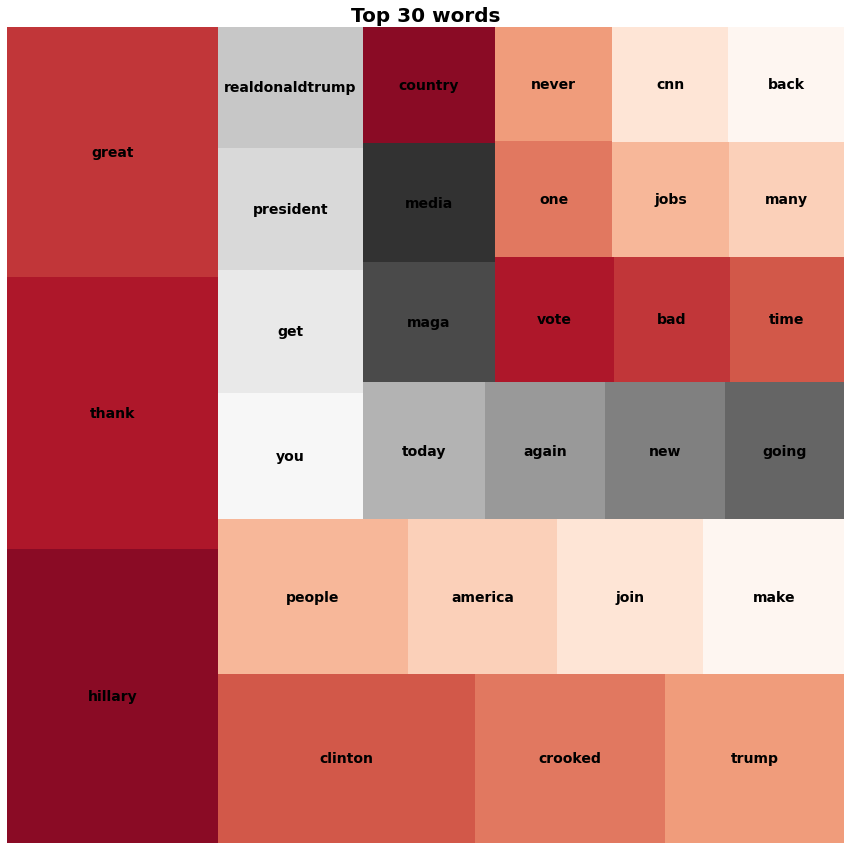

In [ ]:
#during election campagin
compain_year=trump_tweets[(trump_tweets["date"].apply(lambda x: x.year) == 2016) & (trump_tweets["date"].apply(lambda x: x.month) >5) | (trump_tweets["date"].apply(lambda x: x.year) == 2017) &(trump_tweets["date"].apply(lambda x: x.month)==1)]
top50Words(compain_year)


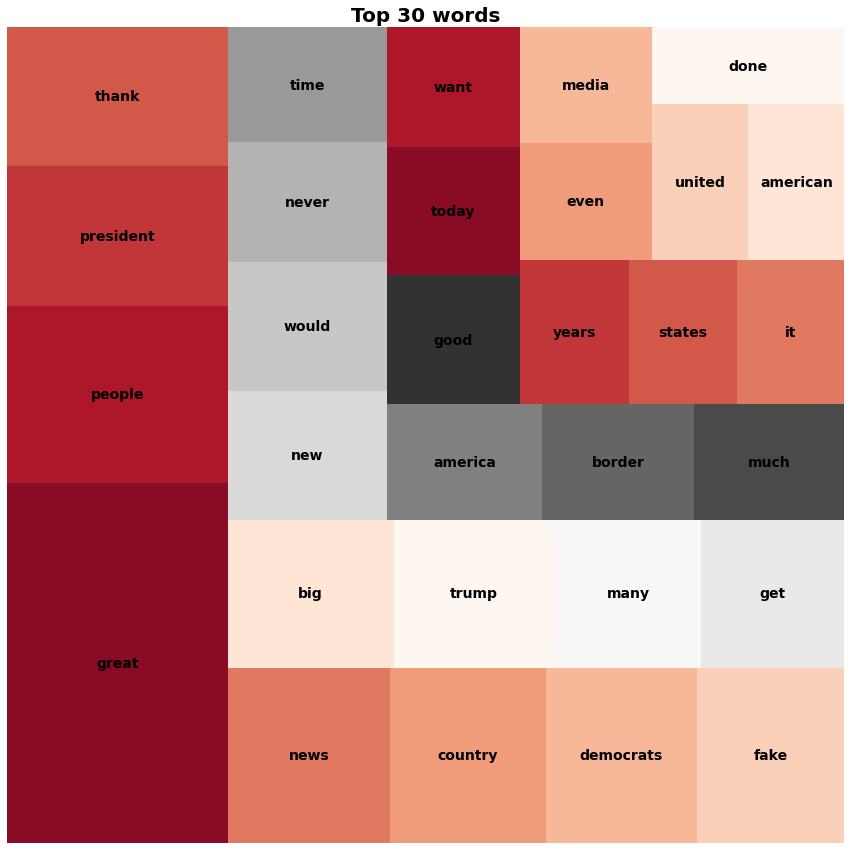

In [ ]:
#Durning presidentail year
president_year=trump_tweets[(trump_tweets["date"].apply(lambda x: x.year)>=2017) &((trump_tweets["date"].apply(lambda x: x.month)>1))]
top50Words(president_year)
